In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing,CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
df_train.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

df_train.head()

In [4]:
df_train.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
df_train["group"].describe()

count    273.000000
mean       1.542125
std        0.499137
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: group, dtype: float64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
df_train.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [7]:
df_train[df_train.Schooling.isna()]

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
204,204,2,38,NaN,3,3,2.0,2,1,1,1,0,0,0,0,1,1,NaN,NaN,2


In [8]:
df_train=df_train[df_train['Initial_Symptom'].isna()==False]
df_train=df_train[df_train['Schooling'].isna()==False]

In [9]:
df_train.Initial_EDSS.value_counts()

Initial_EDSS
1.0    87
2.0    31
3.0     7
Name: count, dtype: int64

In [10]:
df_train.Final_EDSS.value_counts()

Final_EDSS
1.0    80
2.0    34
3.0    11
Name: count, dtype: int64

In [11]:
df_train['Initial_EDSS'].fillna(method='ffill', inplace=True)
df_train['Final_EDSS'].fillna(method='ffill', inplace=True)

In [12]:
df_train.Initial_EDSS.value_counts()

Initial_EDSS
1.0    233
2.0     31
3.0      7
Name: count, dtype: int64

In [13]:
df_train.Final_EDSS.value_counts()

Final_EDSS
1.0    226
2.0     34
3.0     11
Name: count, dtype: int64

In [14]:
df_train.drop(['Unnamed: 0','Initial_EDSS', 'Final_EDSS'], axis =1, inplace = True)
df_train.dropna(inplace= True)
df_train.shape

(271, 17)

In [15]:
df_train.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [16]:
for col in df_train:
  print(col)
  print(df_train[col].value_counts())
  print("--------------------------")

Gender
Gender
2    166
1    105
Name: count, dtype: int64
--------------------------
Age
Age
28    16
24    15
34    14
40    11
29    11
36    11
38    10
22    10
31    10
35     9
25     8
27     8
21     8
39     8
44     7
32     7
19     7
30     7
37     6
41     6
47     5
17     5
50     5
26     5
16     5
43     4
20     4
33     4
45     4
51     4
23     4
46     4
55     3
48     3
59     3
42     3
60     3
53     2
49     2
52     2
56     1
15     1
61     1
54     1
70     1
65     1
18     1
77     1
Name: count, dtype: int64
--------------------------
Schooling
Schooling
20.0    83
15.0    81
12.0    58
9.0     34
22.0     4
6.0      3
25.0     2
14.0     2
0.0      1
23.0     1
24.0     1
8.0      1
Name: count, dtype: int64
--------------------------
Breastfeeding
Breastfeeding
1    131
3     83
2     57
Name: count, dtype: int64
--------------------------
Varicella
Varicella
1    124
2    104
3     43
Name: count, dtype: int64
--------------------------
Initial_S

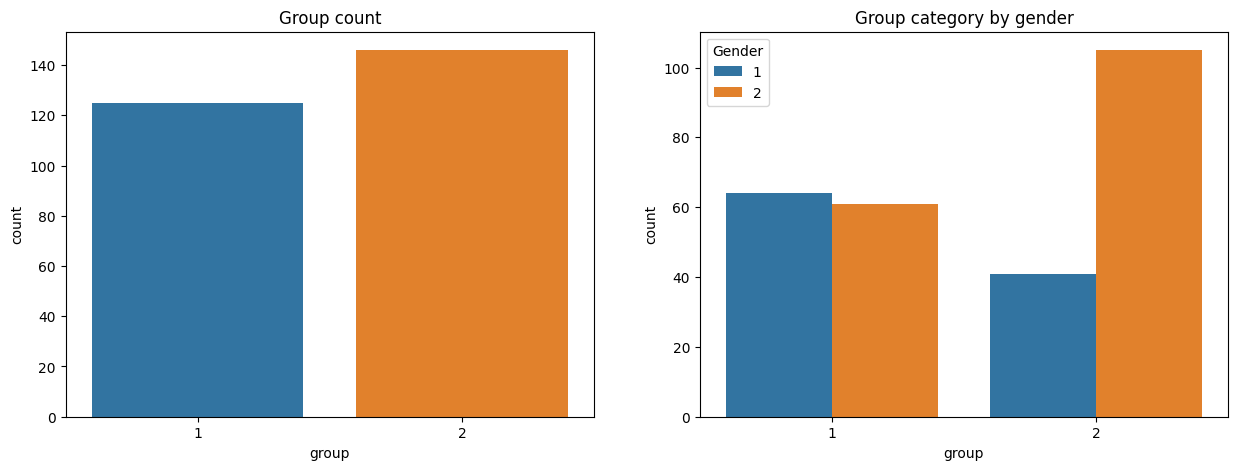

In [17]:
ig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(15,5))
sns.countplot(ax = axes[0],x='group',data = df_train);
sns.countplot(ax = axes[1],x='group',data = df_train,hue = 'Gender');

axes[1].title.set_text('Group category by gender')
axes[0].title.set_text('Group count')


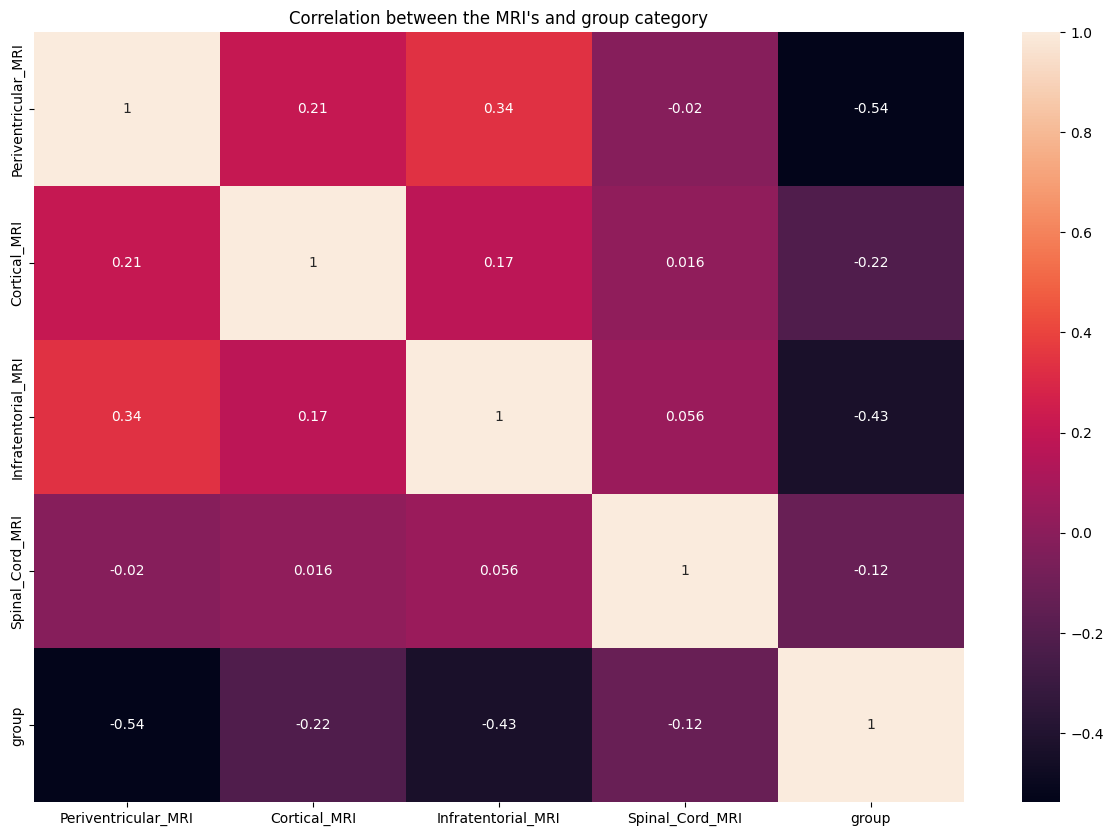

In [18]:
corr =df_train.loc[:,['Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,annot = True)
plt.title('Correlation between the MRI\'s and group category');

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
model = SVC(kernel="linear")

model.fit(X_train,y_train)

svc_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, labels=[1, 2]))


Accuracy: 0.8
              precision    recall  f1-score   support

           1       0.81      0.78      0.79        27
           2       0.79      0.82      0.81        28

    accuracy                           0.80        55
   macro avg       0.80      0.80      0.80        55
weighted avg       0.80      0.80      0.80        55



In [24]:
score = { 
    'Model_Name' : ['SVC'],
       'Score'   : [svc_score]
        }

score_df= pd.DataFrame(score)
score_df

,Model_Name,Score
0,SVC,0.8


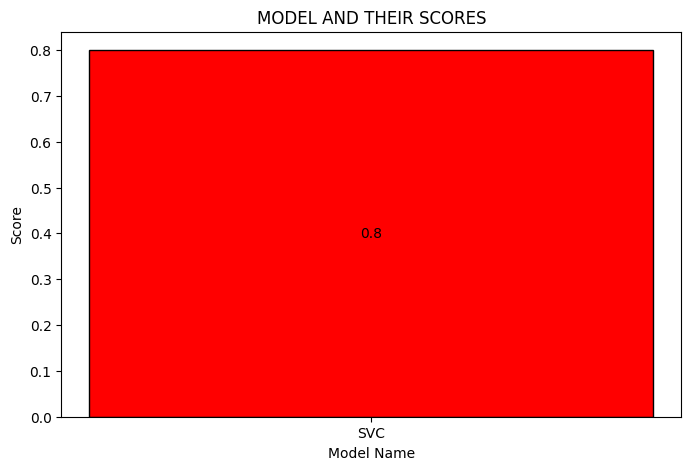

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5))
barplot = plt.bar(score_df.Model_Name, score_df.Score,color =['red', 'yellow', 'pink', 'cyan'] ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(score_df.Score,2), label_type='center')
plt.xlabel("Model Name")
plt.ylabel("Score")
plt.title("MODEL AND THEIR SCORES")
plt.show()

Text(50.722222222222214, 0.5, 'True Labels')

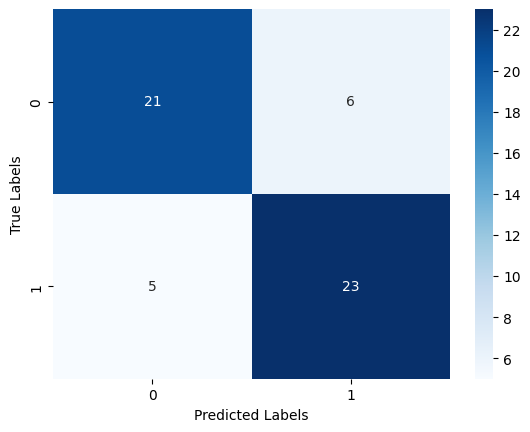

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

In [29]:
import pickle
with open('svc_model.pkl', 'wb') as f:
   pickle.dump(model, f)